In [9]:
!pip install split-folders

In [7]:
import os
import pandas as pd
import numpy as np

In [10]:
import splitfolders
root_folder = '/content/drive/MyDrive/Colab Notebooks/SEM/SEM_orig/'
output_folder='/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/'

In [15]:
for dir in os.listdir(root_folder):
  # split data 0.8 and 0.2 ratio
  input_folder = root_folder + dir
  #print(input_folder)
  output = output_folder + dir
  #print(output)
  splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2), group_prefix=None)

Copying files: 110 files [00:39,  2.78 files/s]
Copying files: 202 files [00:05, 35.13 files/s]
Copying files: 102 files [00:33,  3.01 files/s]
Copying files: 82 files [00:26,  3.11 files/s]


In [ ]:
for dir in os.listdir(output_folder):
  print(dir + ":")
  for subdir in os.listdir(output_folder+dir):
    #for subsubdir in os.listdir(output_folder+dir):
    print(str(subdir) + " images: " + str(len(os.listdir(output_folder+dir+"/"+subdir+"/image"))))

CSV split

In [17]:
bead_orig = pd.read_csv('/content/counts_bead.csv',header= None)
fibre_1crop_orig = pd.read_csv('/content/counts_fibre_1crop.csv',header= None)
fragment_1_orig = pd.read_csv('/content/counts_fragment_1.csv',header= None)
fragment_2_orig = pd.read_csv('/content/counts_fragment_2.csv',header= None)

bead_orig.head()

,0,1,2
0,Dove_men_acrylates_copolymer_microbeads_002.png,1,bead
1,Dove_men_acrylates_copolymer_microbeads_003.png,2,bead
2,Dove_men_acrylates_copolymer_microbeads_004.png,1,bead
3,Dove_men_acrylates_copolymer_microbeads_006.png,1,bead
4,Dove_men_acrylates_copolymer_microbeads_007.png,2,bead


In [18]:
bead_orig = bead_orig.rename(columns={0: "name", 1: "count",2:"class"})
fibre_1crop_orig = fibre_1crop_orig.rename(columns={0: "name", 1: "count",2:"class"})
fragment_1_orig = fragment_1_orig.rename(columns={0: "name", 1: "count",2:"class"})
fragment_2_orig = fragment_2_orig.rename(columns={0: "name", 1: "count",2:"class"})

bead_orig.head()

,name,count,class
0,Dove_men_acrylates_copolymer_microbeads_002.png,1,bead
1,Dove_men_acrylates_copolymer_microbeads_003.png,2,bead
2,Dove_men_acrylates_copolymer_microbeads_004.png,1,bead
3,Dove_men_acrylates_copolymer_microbeads_006.png,1,bead
4,Dove_men_acrylates_copolymer_microbeads_007.png,2,bead


In [19]:
#make a copy of the original csv for test and train

bead_train = bead_orig.copy()
bead_test = bead_orig.copy()

fibre_1crop_train = fibre_1crop_orig.copy()
fibre_1crop_test = fibre_1crop_orig.copy()

fragment_1_train = fragment_1_orig.copy()
fragment_1_test = fragment_1_orig.copy()

fragment_2_train = fragment_2_orig.copy()
fragment_2_test = fragment_2_orig.copy()

In [20]:
to_drop_in_bead_train = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/bead/test/image")
to_drop_in_bead_test = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/bead/train/image")

to_drop_in_fibre_1crop_train = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/fibre_1crop/test/image")
to_drop_in_fibre_1crop_test = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/fibre_1crop/train/image")

to_drop_in_fragment_1_train = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/fragment_1/test/image")
to_drop_in_fragment_1_test = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/fragment_1/train/image")


to_drop_in_fragment_2_train = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/fragment_2/test/image")
to_drop_in_fragment_2_test = os.listdir("/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split/fragment_2/train/image")


In [21]:
#bead train
drop_list =[]
for i in to_drop_in_bead_train:
  i_ = bead_train[bead_train['name']==i].index.values
  drop_list.append(i_[0])

bead_train = bead_train.drop(drop_list)
bead_train = bead_train.reset_index(drop=True)
len(bead_train)

40

In [22]:
drop_list =[]
for i in to_drop_in_bead_test:
  i_ = bead_test[bead_test['name']==i].index.values
  drop_list.append(i_[0])

bead_test = bead_test.drop(drop_list)
bead_test = bead_test.reset_index(drop=True)
len(bead_test)

11

In [23]:
# fibre_1crop_train
drop_list =[]
for i in to_drop_in_fibre_1crop_train:
  i_ = fibre_1crop_train[fibre_1crop_train['name']==i].index.values
  drop_list.append(i_[0])

fibre_1crop_train = fibre_1crop_train.drop(drop_list)
fibre_1crop_train = fibre_1crop_train.reset_index(drop=True)
len(fibre_1crop_train)

80

In [24]:
# fibre_1crop_train
drop_list =[]
for i in to_drop_in_fibre_1crop_test:
  i_ = fibre_1crop_test[fibre_1crop_test['name']==i].index.values
  drop_list.append(i_[0])

fibre_1crop_test = fibre_1crop_test.drop(drop_list)
fibre_1crop_test = fibre_1crop_test.reset_index(drop=True)
len(fibre_1crop_test)

21

In [25]:
#fragment_1_train
drop_list =[]
for i in to_drop_in_fragment_1_train:
  i_ = fragment_1_train[fragment_1_train['name']==i].index.values
  drop_list.append(i_[0])

fragment_1_train = fragment_1_train.drop(drop_list)
fragment_1_train = fragment_1_train.reset_index(drop=True)
len(fragment_1_train)


44

In [26]:
#fragment_1_test
drop_list =[]
for i in to_drop_in_fragment_1_test:
  i_ = fragment_1_test[fragment_1_test['name']==i].index.values
  drop_list.append(i_[0])

fragment_1_test = fragment_1_test.drop(drop_list)
fragment_1_test = fragment_1_test.reset_index(drop=True)
len(fragment_1_test)


11

In [27]:
#fragment_2_train
drop_list =[]
for i in to_drop_in_fragment_2_train:
  i_ = fragment_2_train[fragment_2_train['name']==i].index.values
  drop_list.append(i_[0])

fragment_2_train = fragment_2_train.drop(drop_list)
fragment_2_train = fragment_2_train.reset_index(drop=True)
len(fragment_2_train)


32

In [28]:
#fragment_2_test
drop_list =[]
for i in to_drop_in_fragment_2_test:
  i_ = fragment_2_test[fragment_2_test['name']==i].index.values
  drop_list.append(i_[0])

fragment_2_test = fragment_2_test.drop(drop_list)
fragment_2_test = fragment_2_test.reset_index(drop=True)
len(fragment_2_test)


9

In [30]:
#concat test dataframes
frames = [bead_test , fibre_1crop_test , fragment_1_test ,fragment_2_test]
result = pd.concat(frames)
#save
result.to_csv("counts_test.csv",index=False)

# Data Augmentation

In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
#Flip horizontal
transformH = A.Compose([ A.HorizontalFlip(p=1)])

#flip vertical
transformV = A.Compose([ A.VerticalFlip(p=1)])

#rotate 90 degrees
transformHE = A.Compose([A.HorizontalFlip(p=0.5),A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)])

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/SEM/SEM_orig/bead/image/Dove_men_acrylates_copolymer_microbeads_004.png")
mask = cv2.imread("/content/drive/MyDrive/Colab Notebooks/SEM/SEM_orig/bead/label/Dove_men_acrylates_copolymer_microbeads_004.png")

In [ ]:
transformed = transformV(image=image, mask=mask)
transformed_imageV = transformed['image']
transformed_maskV= transformed['mask']

In [ ]:
transformed = transformH(image=image, mask=mask)
transformed_imageH = transformed['image']
transformed_maskH = transformed['mask']

In [ ]:
transformed = transformHE(image=image, mask=mask)
transformed_imageHE = transformed['image']
transformed_maskHE = transformed['mask']

In [ ]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 10
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))
        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))
        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

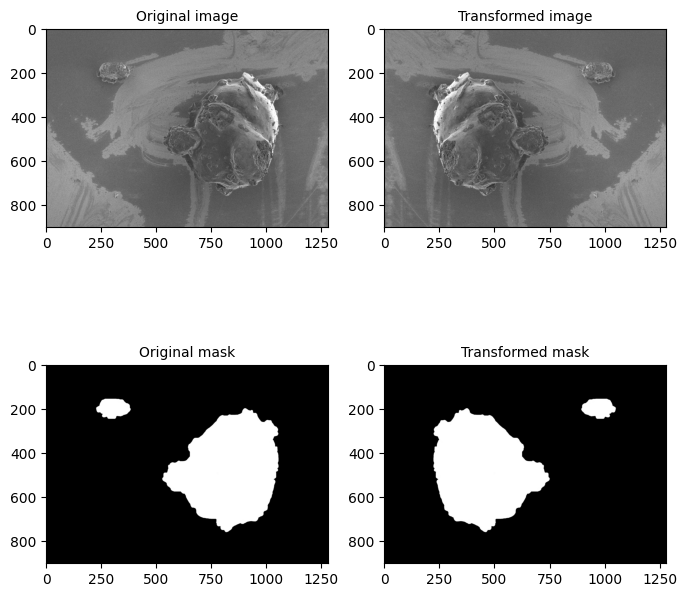

In [ ]:
#Horizontal
visualize(transformed_imageH, transformed_maskH, original_image=image, original_mask=mask)

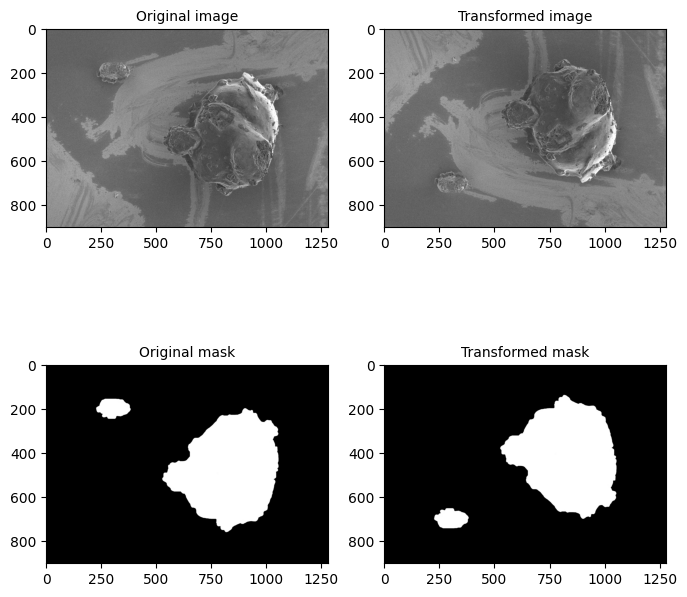

In [ ]:
#vertical flip
visualize(transformed_imageV, transformed_maskV, original_image=image, original_mask=mask)

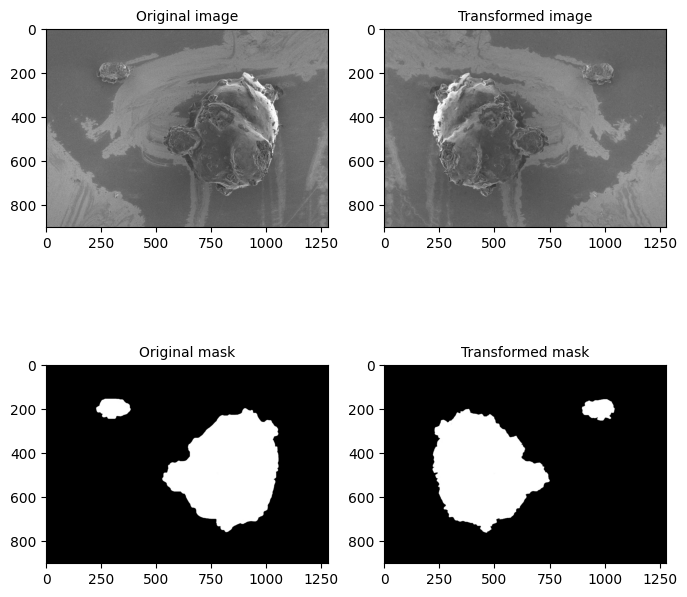

In [ ]:
#rotate
visualize(transformed_imageHE, transformed_maskHE, original_image=image, original_mask=mask)

In [ ]:
#declare folder paths
orig_dataset_folder = "/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split_full"
files_in_master_dataset = os.listdir(orig_dataset_folder)
augmented_images_folder = "/content/drive/MyDrive/Colab Notebooks/SEM/train_test_split_full_augmented"

In [ ]:
for element in files_in_master_dataset:
    counter=0
    print(element)
    images_in_folder= os.listdir(f"{orig_dataset_folder}/{element}/label")


    if element == "fibre_1crop" :
      print("Augment:"+str(element))
      counter = counter+1
      for image_file in images_in_folder:
        mask = cv2.imread(f"{orig_dataset_folder}/{element}/label/{image_file}")
        image = cv2.imread(f"{orig_dataset_folder}/{element}/image/{image_file}")
        filename = str(image_file).split(".")
        #flip horizontal
        transformed = transformH(image=image, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']
        cv2.imwrite(f"{augmented_images_folder}/{element}/image/{filename[0]}_{counter}.png",transformed_image)
        cv2.imwrite(f"{augmented_images_folder}/{element}/label/{filename[0]}_{counter}.png",transformed_mask)

    else:
      print("Augment: "+str(element))
      counter = counter+1
      for image_file in images_in_folder:
        mask = cv2.imread(f"{orig_dataset_folder}/{element}/label/{image_file}")
        image = cv2.imread(f"{orig_dataset_folder}/{element}/image/{image_file}")
        filename = str(image_file).split(".")
        #flip horizontal
        transformed = transformH(image=image, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']
        cv2.imwrite(f"{augmented_images_folder}/{element}/image/{filename[0]}_{counter}.png",transformed_image)
        cv2.imwrite(f"{augmented_images_folder}/{element}/label/{filename[0]}_{counter}.png",transformed_mask)

        #flip vertical
        transformed = transformV(image=image, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']
        cv2.imwrite(f"{augmented_images_folder}/{element}/image/{filename[0]}_{counter+1}.png",transformed_image)
        cv2.imwrite(f"{augmented_images_folder}/{element}/label/{filename[0]}_{counter+1}.png",transformed_mask)

        #flip + elastic
        transformed = transformHE(image=image, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']
        cv2.imwrite(f"{augmented_images_folder}/{element}/image/{filename[0]}_{counter+2}.png",transformed_image)
        cv2.imwrite(f"{augmented_images_folder}/{element}/label/{filename[0]}_{counter+2}.png",transformed_mask)



fragment_1
Augment: fragment_1
fibre_1crop
Augment:fibre_1crop
bead
Augment: bead
fragment_2
Augment: fragment_2


# Update train dataframe

In [ ]:
#make a copy of the original csv

# Copy 3 times since 3 transformations in the dataset were done
bead_train_aug1 = bead_train.copy()
bead_train_aug2 = bead_train.copy()
bead_train_aug3 = bead_train.copy()


fragment_1_train_aug1 = fragment_1_train.copy()
fragment_1_train_aug2 = fragment_1_train.copy()
fragment_1_train_aug3 = fragment_1_train.copy()

fragment_2_train_aug1 = fragment_2_train.copy()
fragment_2_train_aug2 = fragment_2_train.copy()
fragment_2_train_aug3 = fragment_2_train.copy()



fibre_1crop_train_aug1 = fibre_1crop_train.copy()


In [ ]:
for i in range(len(bead_train_aug1)):
  filename = bead_train_aug1['name'][i].split(".png")
  bead_train_aug1['name'][i] = filename[0]+"_1.png"
  bead_train_aug2['name'][i] = filename[0]+"_2.png"
  bead_train_aug3['name'][i] = filename[0]+"_3.png"


for i in range(len(fragment_1_train_aug1)):
  filename = fragment_1_train_aug1['name'][i].split(".png")
  fragment_1_train_aug1['name'][i] = filename[0]+"_1.png"
  fragment_1_train_aug2['name'][i] = filename[0]+"_2.png"
  fragment_1_train_aug3['name'][i] = filename[0]+"_3.png"


for i in range(len(fragment_2_train_aug1)):
  filename = fragment_2_train_aug1['name'][i].split(".png")
  fragment_2_train_aug1['name'][i] = filename[0]+"_1.png"
  fragment_2_train_aug2['name'][i] = filename[0]+"_2.png"
  fragment_2_train_aug3['name'][i] = filename[0]+"_3.png"


for i in range(len(fibre_1crop_train_aug1)):
  filename = fibre_1crop_train_aug1['name'][i].split(".png")
  fibre_1crop_train_aug1['name'][i] = filename[0]+"_1.png"


In [ ]:
#concat dataframes
frames = [bead_train, bead_train_aug1,bead_train_aug2,bead_train_aug3]
result = pd.concat(frames)
#save
result.to_csv("counts_bead_train_all.csv",index=False)


#concat dataframes
frames = [fragment_1_train, fragment_1_train_aug1,fragment_1_train_aug2,fragment_1_train_aug3]
result = pd.concat(frames)
#save
result.to_csv("counts_fragment_1_train_all.csv",index=False)

#concat dataframes
frames = [fragment_2_train, fragment_2_train_aug1,fragment_2_train_aug2,fragment_2_train_aug3]
result = pd.concat(frames)
#save
result.to_csv("counts_fragment_2_train_all.csv",index=False)



#concat dataframes
frames = [fibre_1crop_train, fibre_1crop_train_aug1]
result = pd.concat(frames)
#save
result.to_csv("counts_fibre_1crop_train_all.csv",index=False)
